# Introduction

Cricket is the most popular sport in India. There are various formats of this game and the most loved is the IPL. In this project, I'm trying to analyze the data related to IPL matches from year 2008 to 2020. My aim will be to draw useful insights and look out for the major factors that help teams win the matches. I will be using pandas & numpy for data manipulation and matplotlib & seaborn for data visualization

# Data Preparation and Cleaning

This the crucial step in data analysis. We have to make sure that there are no missing values or outliers in the data which will potentially trouble us while drawing the insights.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
ipl_df = pd.read_csv(r"C:\Users\anjal\Desktop\IPL Matches 2008-2020.csv")

print(ipl_df)

          id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                              Wankhede Stadium              0 

In [24]:
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


## Find Missing Value

In [32]:
# getting sum of missing value of each attributes

ipl_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [28]:
#number of rows and colums 
ipl_df.shape

(816, 17)

In [29]:
#getting information about the data 

ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [30]:
#parsing the dates
ipl_df['date'] = pd.to_datetime(ipl_df.date)
ipl_df['year'] = pd.DatetimeIndex(ipl_df.date).year
ipl_df['month'] = pd.DatetimeIndex(ipl_df.date).month
ipl_df['day'] = pd.DatetimeIndex(ipl_df.date).day
ipl_df['weekday'] = pd.DatetimeIndex(ipl_df.date).weekday

In [33]:
# since there are no missing values in venue we can use that to fill in the city

ipl_df[ipl_df['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,wickets,8.0,N,NaN,Aleem Dar,S Ravi,2014,4,17,3
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,...,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,2014,4,19,5
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,...,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,19,5
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,20,6
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,runs,72.0,N,NaN,M Erasmus,S Ravi,2014,4,22,1
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,...,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014,4,23,2
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,24,3
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,...,runs,4.0,N,NaN,M Erasmus,S Ravi,2014,4,25,4
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,25,4
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,...,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,27,6


In [34]:
#judging by the venue all these matches have been played in Dubai

ipl_df['city'].fillna('Dubai',inplace=True)
ipl_df['city'].isnull().sum()

0

In [37]:
ipl_df[ipl_df["player_of_match"].isnull()]

#there are null values for the winner, result and result_margin as well
#these rows seem to be invalid therefore we will remove them

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,...,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,2011,5,21,5
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,2015,4,29,2
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,2015,5,17,6
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,2019,4,30,1


In [36]:
#I have observed that the M Chinnaswamy Stadium has been mentioned in two different ways
#the observation made while plotting the pie chart
#also Rising Pune Supergiants had been mispelled in some case

ipl_df['venue'].replace({'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium'}, inplace=True)
ipl_df.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

In [38]:
ipl_df.drop([241,486,511,744], inplace=True)
ipl_df.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [39]:
# Now we have only missing values in result margin and method

ipl_df[ipl_df['result_margin'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,...,tie,NaN,Y,NaN,MR Benson,M Erasmus,2009,4,23,3
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,...,tie,NaN,Y,NaN,K Hariharan,DJ Harper,2010,3,21,6
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,...,tie,NaN,Y,NaN,AK Chaudhary,S Ravi,2013,4,7,6
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni,2013,4,16,1
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,...,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary,2014,4,29,1
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,M Erasmus,S Ravi,2015,4,21,1
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,...,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney,2017,4,29,5
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,...,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon,2019,3,30,5
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,...,tie,NaN,Y,NaN,CK Nandan,S Ravi,2019,5,2,3
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon,2020,9,20,6


In [40]:
#since all the matches with null values in result_margin were tied, therefore the result_margin should be 0

ipl_df['result_margin'].fillna(0, inplace=True)

In [41]:
#getting the unique values of the method column

ipl_df.method.unique()

array([nan, 'D/L'], dtype=object)

In [42]:
#D/L is used for rain affected matches only
#therefore we will fill 'regular' for all the other matches

ipl_df['method'].fillna('regular', inplace=True)

In [43]:
#see all the missing values have been replaced

ipl_df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
year               0
month              0
day                0
weekday            0
dtype: int64

# Now, we will  prepare and clean the IPL ball-by-ball data

In [45]:
#loading the ball-by-ball dataset into our notebook

ipl_df1=pd.read_csv(r"C:\Users\anjal\Desktop\IPL Ball-by-Ball 2008-2020.csv")

print(ipl_df1)

             id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1

In [46]:
ipl_df1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [47]:
#number of rows and colums 
ipl_df1.shape

(193468, 18)

In [48]:
# information about the dataset 
ipl_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [49]:
#osberved that Rising Pune Supergiants had been mispelled at some places

ipl_df1.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

In [51]:
# getting sum of missing value of each attributes

ipl_df1.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [52]:
#Number of wickets taken in all the season 

len(ipl_df1[ipl_df1.is_wicket==0])

183973

In [54]:
#No extra run obtained for the ball played 

len(ipl_df1[ipl_df1.extra_runs==0])

183235

# 📌Observations :

1. This data gives the ball by ball information about the matches from 2008-2020. Observe that the number of rows in which the ball doesn't give wicket is same as null values in `dismisaal_kind` and `player_dismissed`. The reason for this is the wicket wasn't fallen for these balls and that lead to the null values in respective dependent rows. So here we will fill Not Applicable i.e. `NA` in such columns.
2. When the ball caused dismissal without reaching any fielder (including wicket keeper) or has been hit for the boundary or went for the boundary as extra runs in such scenarios the ball doesn't reach to any fielder. So will replace the missing values with `NA` here as well.
3. The number of rows when there are no extra runs is equal to the number of rows containing missing values for extra type. Therefore, we can safely conclude that the null value in the extra type are due to absence of any extra run. We can fill the null values as `NA` there.



In [55]:
#filling the missing values for dismissal_kind and player_dismissed


ipl_df1['dismissal_kind'].fillna('NA',inplace=True)
ipl_df1['player_dismissed'].fillna('NA',inplace=True)
ipl_df1['fielder'].fillna('NA', inplace=True)
ipl_df1['extras_type'].fillna('NA', inplace=True)

##### For filling the missing values in the bowling team we need to know the names of teams playing the match. This can be achieved by merging both the datasets over the id column.

In [57]:
#merging the both datasets over id
ipl_df2 = ipl_df.merge(ipl_df1, on="id")

print(ipl_df2)

             id       city       date player_of_match  \
0        335982  Bangalore 2008-04-18     BB McCullum   
1        335982  Bangalore 2008-04-18     BB McCullum   
2        335982  Bangalore 2008-04-18     BB McCullum   
3        335982  Bangalore 2008-04-18     BB McCullum   
4        335982  Bangalore 2008-04-18     BB McCullum   
...         ...        ...        ...             ...   
193091  1237181      Dubai 2020-11-10        TA Boult   
193092  1237181      Dubai 2020-11-10        TA Boult   
193093  1237181      Dubai 2020-11-10        TA Boult   
193094  1237181      Dubai 2020-11-10        TA Boult   
193095  1237181      Dubai 2020-11-10        TA Boult   

                                      venue  neutral_venue  \
0                     M Chinnaswamy Stadium              0   
1                     M Chinnaswamy Stadium              0   
2                     M Chinnaswamy Stadium              0   
3                     M Chinnaswamy Stadium              0   
4    

In [58]:
ipl_df2.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [59]:
len(ipl_df1)-len(ipl_df2)

372

In [60]:
len(ipl_df2['id'].unique())==len(ipl_df1['id'].unique())

False

In [61]:
ipl_df2['bowling_team'].isnull().sum()

0


Though, I have merged the data over id I have 372 less rows than that of the ball-by-ball dataset. It so because some of the id's are not present in the matches dataset. The mssing id's from the matches dataset didn't include the id's from of the rows where the bowling team was missing therefore those has to be the unnecessary rows. This keeps us 181 rows for which the id must not be matching for some reason. This dataframe could be of further use in the upcoming steps of the analysis.



In [62]:
ipl_df2.isnull().sum()

id                  0
city                0
date                0
player_of_match     0
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
eliminator          0
method              0
umpire1             0
umpire2             0
year                0
month               0
day                 0
weekday             0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

In [64]:
#statistical measures of the numeric columns of IPL Matches Dataset

ipl_df.describe()

,id,neutral_venue,result_margin,year,month,day,weekday
count,8.120000e+02,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,7.559630e+05,0.094828,17.044335,2013.921182,4.820197,15.715517,3.467980
std,3.061363e+05,0.293157,21.998666,3.667929,1.563198,8.274818,2.035495
min,3.359820e+05,0.000000,0.000000,2008.000000,3.000000,1.000000,0.000000
25%,5.012268e+05,0.000000,6.000000,2011.000000,4.000000,9.000000,2.000000
50%,7.292960e+05,0.000000,8.000000,2014.000000,5.000000,16.000000,4.000000
75%,1.082626e+06,0.000000,19.000000,2017.000000,5.000000,22.000000,5.000000
max,1.237181e+06,1.000000,146.000000,2020.000000,11.000000,31.000000,6.000000


In [66]:
##stastical informaition of the numeric columns of the IPL Ball-by-Ball dataset

ipl_df1.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [69]:
#statistical measures of the categorical columns for IPL Matches Dataset

ipl_df.describe(include=['O'])

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,method,umpire1,umpire2
count,812,812,812,812,812,812,812,812,812,812,812,812,812
unique,32,233,36,15,15,15,2,15,3,2,2,48,47
top,Mumbai,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,regular,HDPK Dharmasena,S Ravi
freq,101,23,77,105,106,106,493,120,435,799,793,77,84


In [70]:
#stastical informaition of the categorical columns of the IPL Ball-by-Ball dataset

ipl_df1.describe(include=['O'])

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193468,193468,193468,193468,193468,193468,193468,193468,193277
unique,537,530,420,10,507,880,6,14,14
top,V Kohli,S Dhawan,Harbhajan Singh,NA,NA,NA,NA,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,183973,183973,186684,183235,24466,24453


# who win the match

Text(0.5, 0, 'Teams')

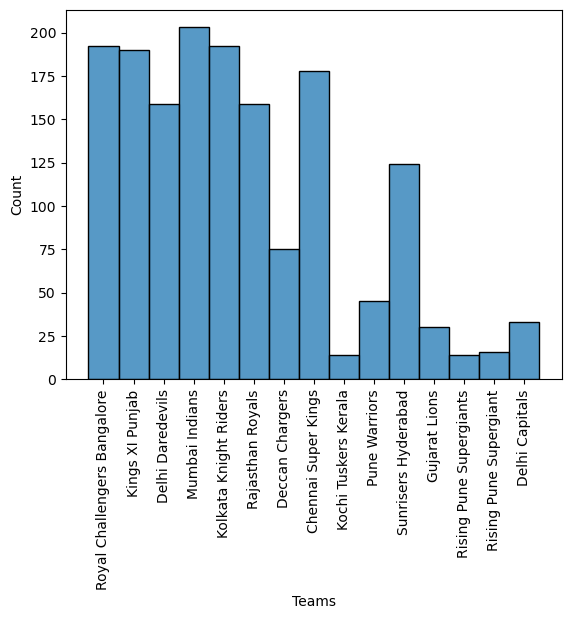

In [72]:
#matches played by each team

played=list(ipl_df['team1'])+list(ipl_df['team2'])
sns.histplot(played)
plt.xticks(rotation=90)
plt.xlabel('Teams')

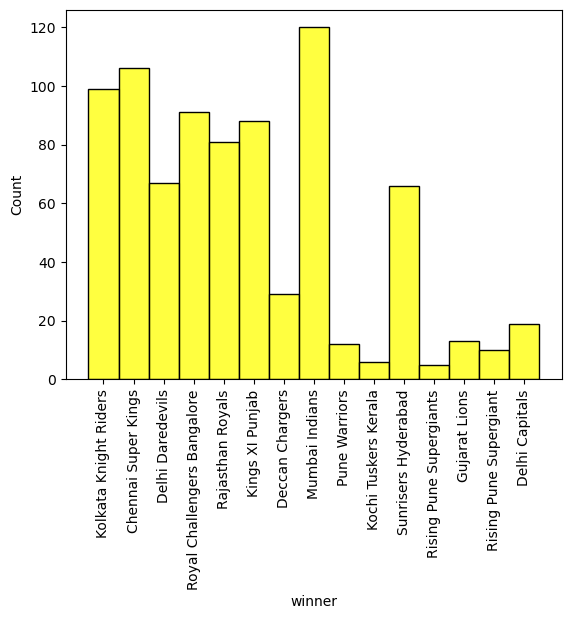

In [76]:
#matches won by each team

sns.histplot(ipl_df['winner'], color='yellow')
plt.xticks(rotation=90);

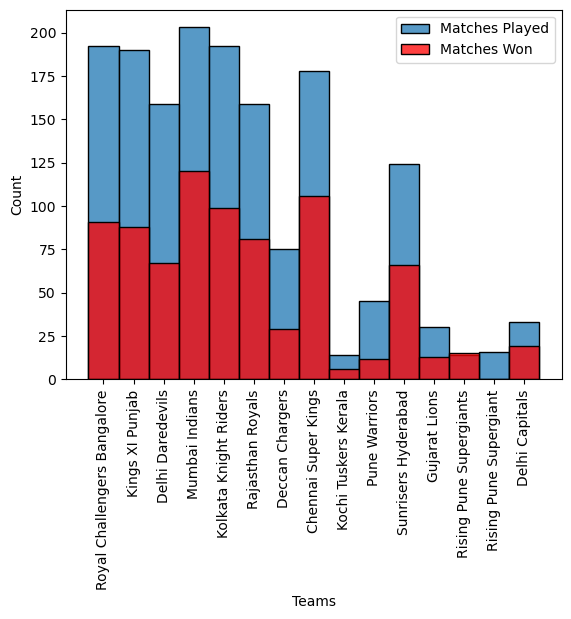

In [74]:
#comparing the matches played and matches won by each team

sns.histplot(played)
sns.histplot(ipl_df['winner'], color='red')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams');


## Result: Mumbai indians has played and won most of matches.




# Player of the match



In [77]:
#counting the top 10 players who have won player of the match award using value_counts()


player_of_match=ipl_df.player_of_match.value_counts().head(10)
player_of_match

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

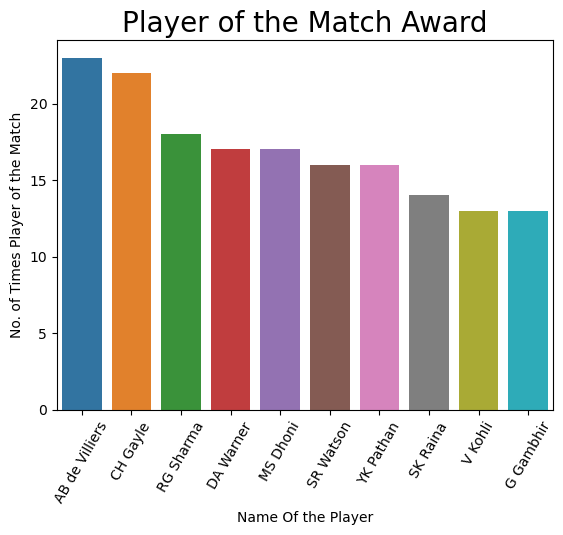

In [78]:
sns.barplot(x=player_of_match.index, y=player_of_match)
plt.xticks(rotation=60)
plt.ylabel('No. of Times Player of the Match')
plt.xlabel('Name Of the Player')
plt.title('Player of the Match Award', fontsize=20);

## Team's Winning Proportion Each Year

It is the % of matches won by the team in the particular year. It shows dominance of the team.

Year : 2008 < ================================================== >


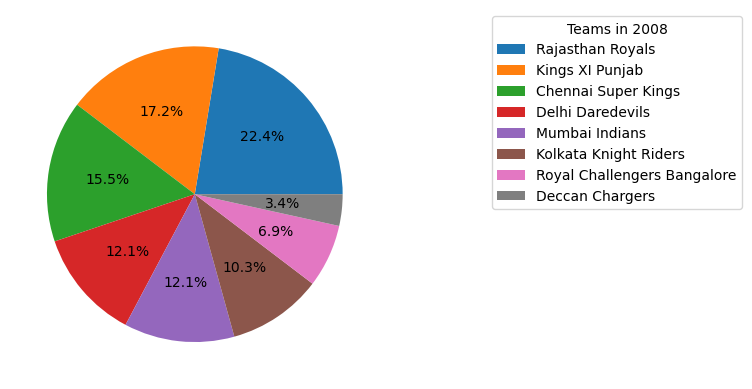

Year : 2009 < ================================================== >


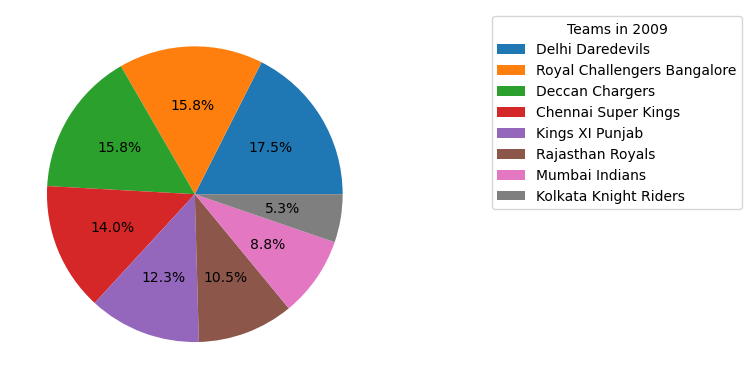

Year : 2010 < ================================================== >


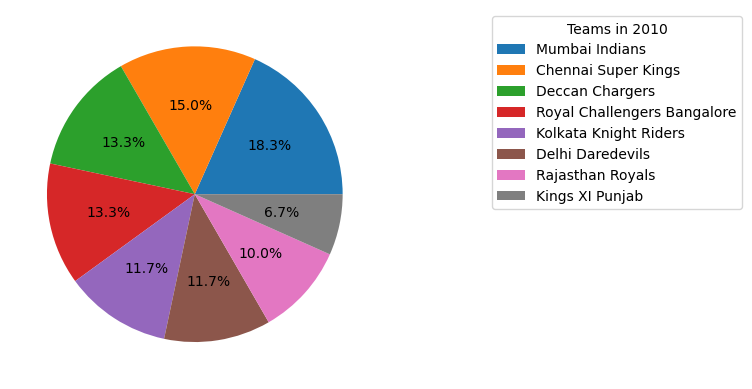

Year : 2011 < ================================================== >


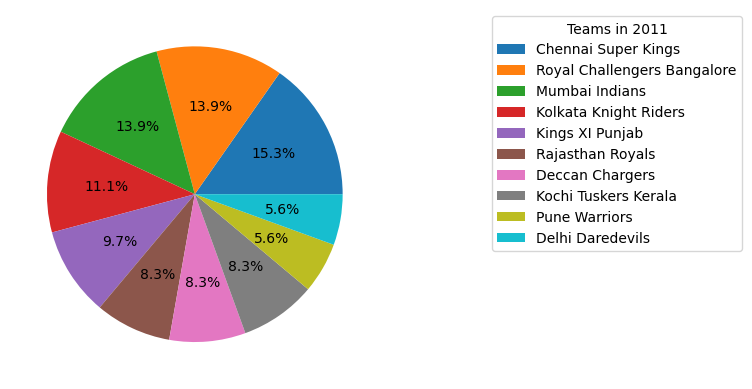

Year : 2012 < ================================================== >


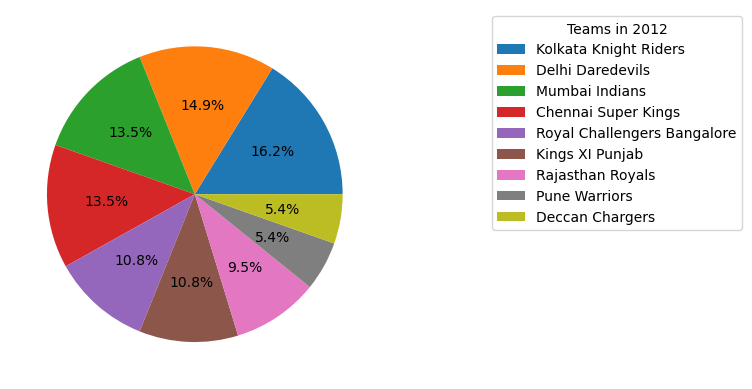

Year : 2013 < ================================================== >


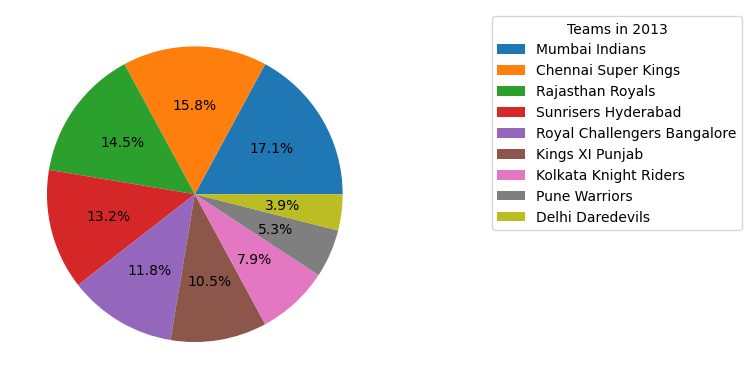

Year : 2014 < ================================================== >


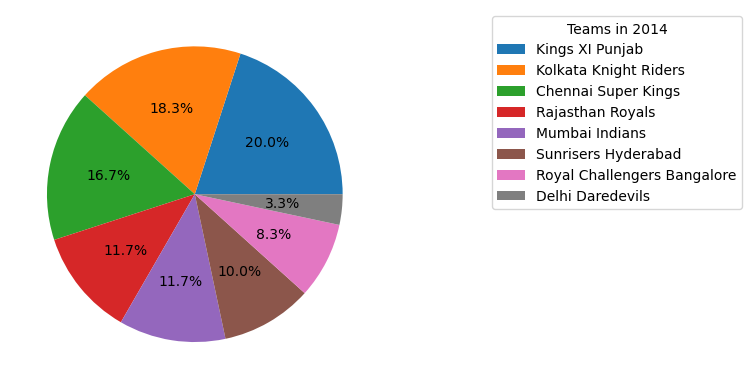

Year : 2015 < ================================================== >


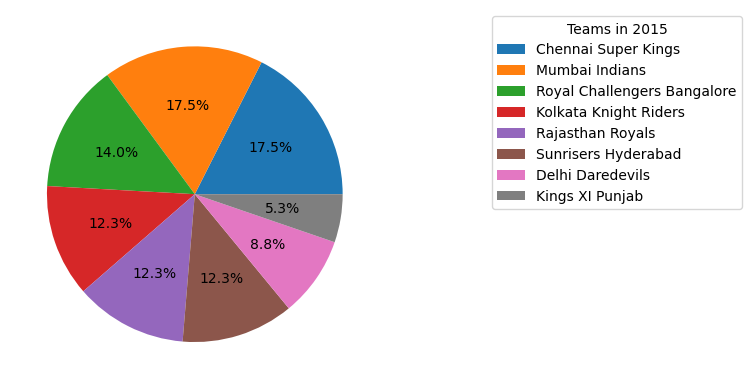

Year : 2016 < ================================================== >


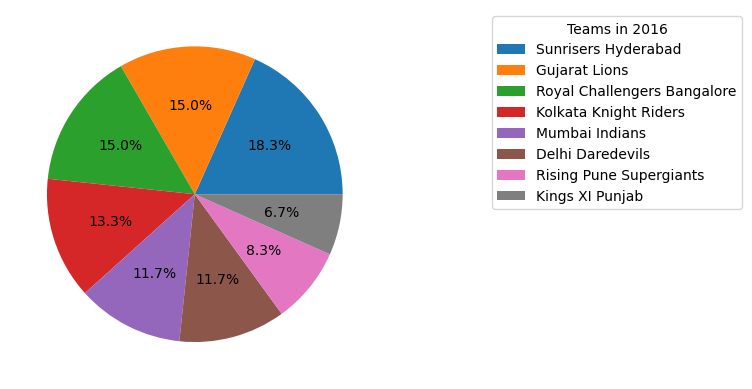

Year : 2017 < ================================================== >


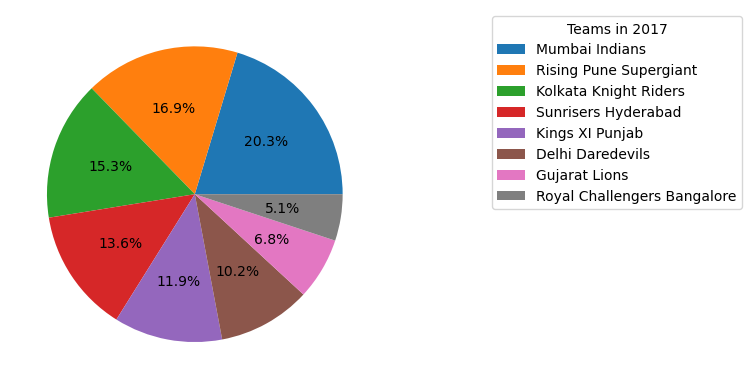

Year : 2018 < ================================================== >


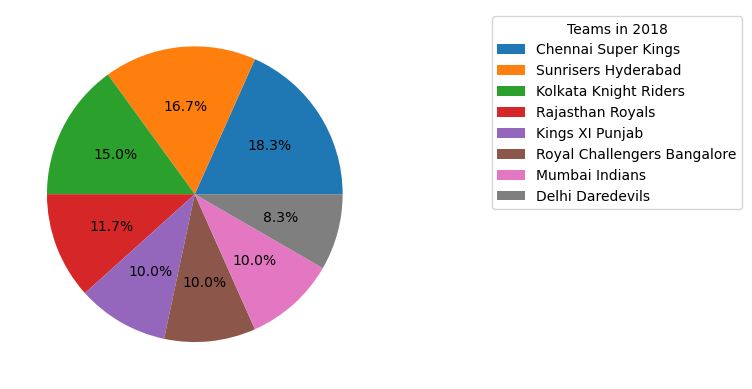

Year : 2019 < ================================================== >


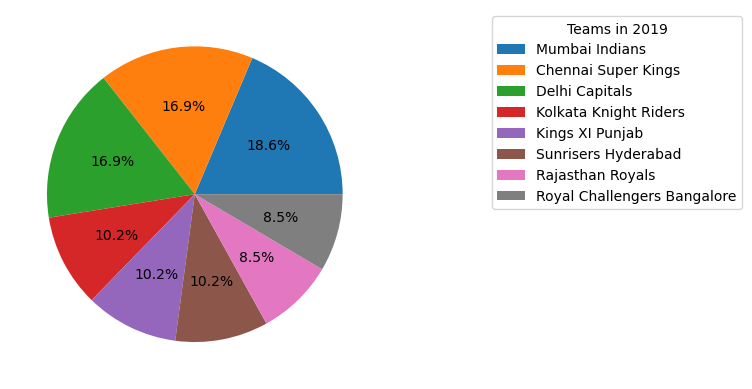

Year : 2020 < ================================================== >


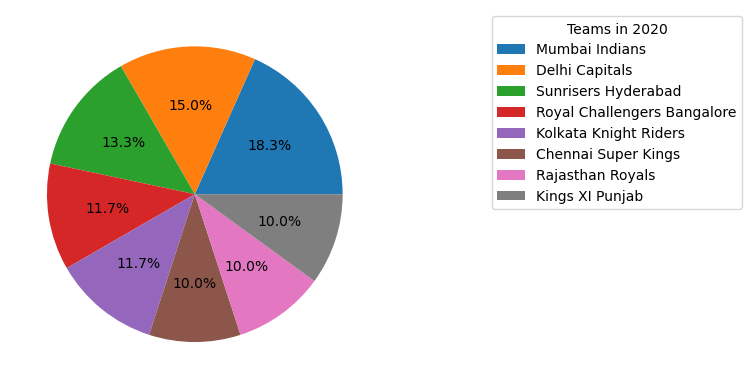

In [80]:
#using for loop for selecting each year from the list of the years

for i in ipl_df.year.unique():
    print("Year :", i,'<', '='*50,'>')
    xipl_df=ipl_df[ipl_df.year==i] #conditioning over the year
    plt.pie(xipl_df.winner.value_counts(),autopct="%1.1f%%" ) #plotting pie chart of the winner's value counts
    plt.legend(xipl_df.winner.value_counts().index,bbox_to_anchor=(2,1),loc='upper right', title='Teams in {}'.format(i))
    plt.show();



From this pie chart we can easily show that which team is won most and least matches in each year 



# Run Scored Per Over 

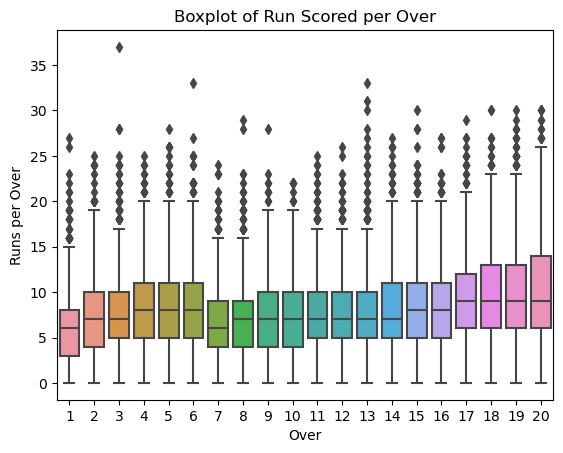

In [81]:
#grouping with conditions
xd=ipl_df1.groupby(['id', 'over','inning'], as_index=False)['total_runs'].sum()

#changing the range of overs from 0-19 to 1-20
xd['over']=xd['over']+1

#boxplot for distribution
sns.boxplot(y=xd['total_runs'], x=xd['over'])
plt.title('Boxplot of Run Scored per Over')
plt.ylabel('Runs per Over')
plt.xlabel('Over');

Text(0, 0.5, 'Runs per Over')

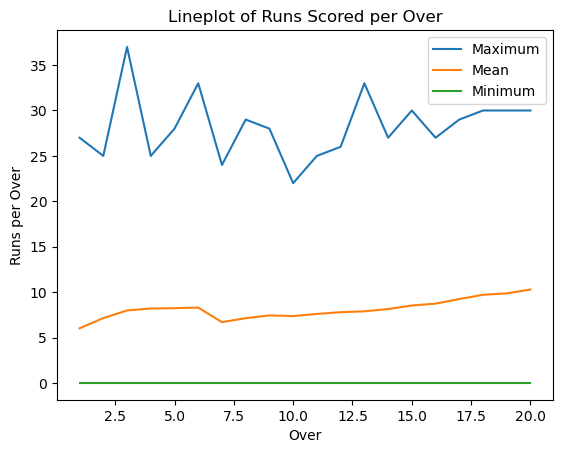

In [83]:
#grouping for finding maximum, minimum and mean

minimum=xd.groupby('over', as_index=False)['total_runs'].min()
maximum=xd.groupby('over', as_index=False)['total_runs'].max()
mean=xd.groupby('over', as_index=False)['total_runs'].mean()

#plotting lineplot with maximum, minmum and mean

sns.lineplot(data=maximum, x='over', y='total_runs')
sns.lineplot(data=mean, x='over', y='total_runs')
sns.lineplot(data=minimum, x='over', y='total_runs')
plt.legend(['Maximum', 'Mean', 'Minimum'])
plt.title('Lineplot of Runs Scored per Over')
plt.xlabel('Over')
plt.ylabel('Runs per Over')

# which player scored most runs in all seasons and each individual season

In [84]:
#grouping batsman runs based on the batsman for all seasons

#this are the top 10 players who have scored most runs in all IPL Season

xd=ipl_df2.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(10)
xd


,batsman,batsman_runs
505,V Kohli,5851
438,SK Raina,5368
116,DA Warner,5235
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4782
96,CH Gayle,4761
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


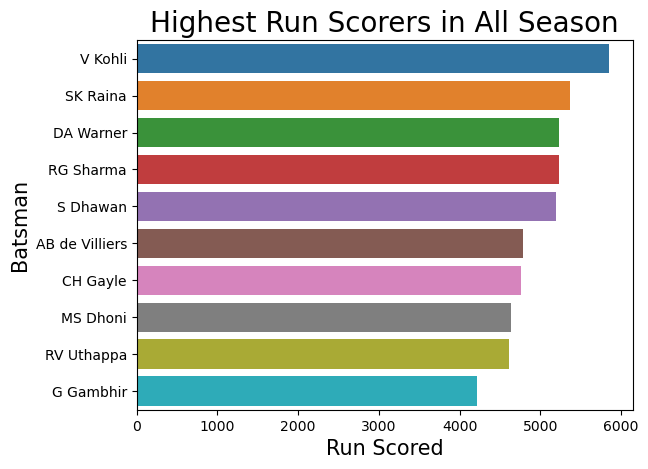

In [85]:
#barplot using above dataframe

sns.barplot(x=xd['batsman_runs'], y=xd['batsman'])
plt.title('Highest Run Scorers in All Season', fontsize=20)
plt.xlabel('Run Scored', fontsize=15 )
plt.ylabel('Batsman', fontsize=15);

In [89]:
#finding the top scorer for each season using looping
#creating a dictionary

top_scorers={}
for i in list(ipl_df.year.unique()): #using for loop for getting each year (season)
    xd=ipl_df2[ipl_df2.year==i] #conditioning based on the season
    yd=xd.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(1)
    
    #finding the top scorer each season and adding the to the dictionary created before
    
    top_scorers[(yd['batsman'].iloc[0]+str(' ')+str(i))]=yd['batsman_runs'].iloc[0]

In [90]:
top_scorers

{'SE Marsh 2008': 616,
 'ML Hayden 2009': 572,
 'SR Tendulkar 2010': 618,
 'CH Gayle 2011': 608,
 'CH Gayle 2012': 733,
 'MEK Hussey 2013': 733,
 'RV Uthappa 2014': 660,
 'DA Warner 2015': 562,
 'V Kohli 2016': 973,
 'DA Warner 2017': 641,
 'KS Williamson 2018': 735,
 'DA Warner 2019': 692,
 'KL Rahul 2020': 670}

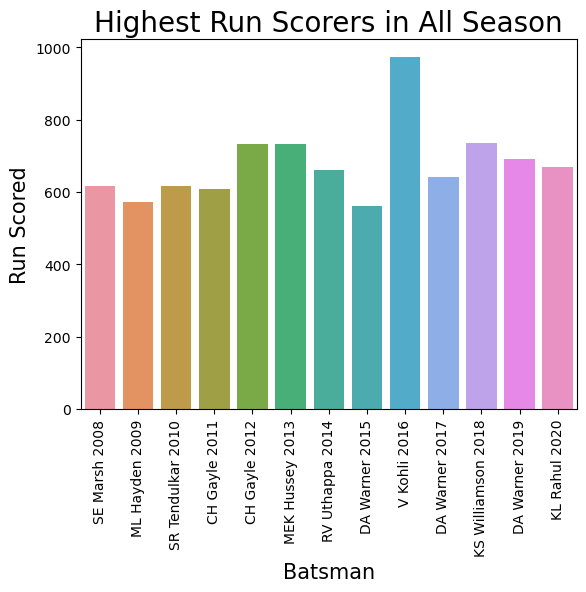

In [91]:
#assinging the values to the variables
x=list(top_scorers.keys())
y=list(top_scorers.values())

#plotting barplot of the top scorers for the respective season
sns.barplot(x=x, y=y )
plt.xticks(rotation=90)
plt.title('Highest Run Scorers in All Season', fontsize=20)
plt.ylabel('Run Scored', fontsize=15 )
plt.xlabel('Batsman', fontsize=15);